In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/IR - 21.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, shuffle=False, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, shuffle=False, random_state = 0)

In [4]:
train = X_train.append(y_train)
train = train.reset_index(drop=True)
train

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
193843,0.075532,0.038625,1
193844,0.135633,-0.050747,1
193845,-0.041421,0.081155,1
193846,-0.097461,0.054445,1


In [5]:
test = X_test.append(y_test)
test = test.reset_index(drop=True)
test

,DE,FE,Fault
0,0.058204,-0.015204,0
1,0.011057,0.005958,0
2,-0.066548,0.066362,0
3,-0.131845,0.110535,0
4,-0.132471,0.096153,0
...,...,...,...
48457,0.041421,-0.061431,1
48458,0.079187,0.121218,1
48459,-0.083654,0.120807,1
48460,-0.031269,-0.092865,1


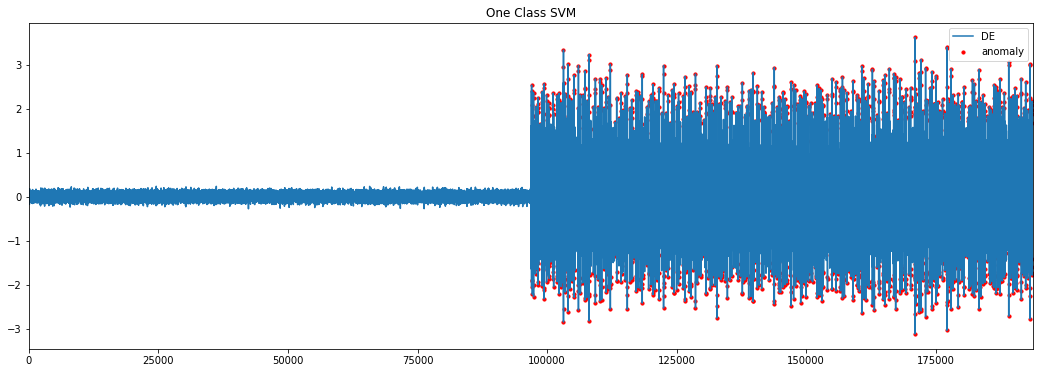

In [6]:
from sklearn.svm import OneClassSVM

train_data = train[['DE', 'FE', 'Fault']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(train_data)
train_data = pd.DataFrame(np_scaled)
outliers_fraction = 0.01

# train oneclassSVM 
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
pred_train = model.fit(train_data)
train['anomaly'] = pd.Series(model.predict(train_data))

train_anomalies = train[train['anomaly'] == -1]

f, (ax3) = plt.subplots(figsize=(18, 6))
ax3.scatter(train_anomalies.index, train_anomalies.DE, label='anomaly', color='red', s=10)
ax3.plot(train.index, train.DE, label='DE');
plt.xlim((0,len(train.index)))

plt.title('One Class SVM')
plt.legend();
plt.show();

In [7]:
train_anomalies

,DE,FE,Fault,anomaly
97002,2.400385,0.119369,1,-1
97004,-2.044246,0.539524,1,-1
97006,2.540079,-0.345985,1,-1
97016,-0.957149,0.535825,1,-1
97025,-0.598167,-0.520622,1,-1
...,...,...,...,...
193585,-1.737650,-0.046022,1,-1
193586,1.885872,0.253942,1,-1
193587,2.171352,0.024244,1,-1
193589,-1.785162,-0.343931,1,-1


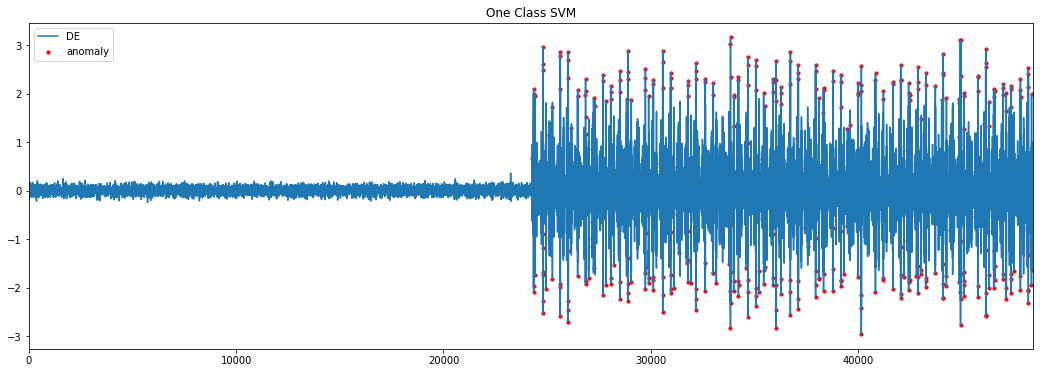

In [8]:
test_data = test[['DE', 'FE', 'Fault']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(test_data)
test_data = pd.DataFrame(np_scaled)
outliers_fraction = 0.01

test['anomaly'] = pd.Series(model.predict(test_data))

test_anomalies = test[test['anomaly'] == -1]

f, (ax3) = plt.subplots(figsize=(18, 6))
ax3.scatter(test_anomalies.index, test_anomalies.DE, label='anomaly', color='red', s=10)
ax3.plot(test.index, test.DE, label='DE');
plt.xlim((0,len(test.index)))

plt.title('One Class SVM')
plt.legend();
plt.show();

In [9]:
test_anomalies

,DE,FE,Fault,anomaly
24290,0.662735,-0.644511,1,-1
24346,1.997140,0.158611,1,-1
24348,-1.956125,0.166418,1,-1
24350,2.099474,-0.325235,1,-1
24352,-2.090946,-0.269762,1,-1
...,...,...,...,...
48225,-2.067799,-0.087113,1,-1
48229,-1.320598,0.567671,1,-1
48372,-1.940288,0.246751,1,-1
48374,1.988612,0.226411,1,-1


In [10]:
from sklearn.metrics import accuracy_score
score = 100 * accuracy_score(test['anomaly'], test['Fault'])
print("Accuracy: {:.2f}%".format(score))

Accuracy: 49.01%


In [11]:
print("Anomalies: {}".format(test_anomalies['anomaly'].count()))

Anomalies: 482
